# Lab01: Experimento com instrumentação virtual
---
Grupo:  Arthur Caldeira, Dárcio Melo, Felipe Daniel e Vinicius Henriques


**Enunciado:** Desenvolver uma aplicação em LABVIEW ou Python com as seguintes características:

* Simular um sinal de tensão com amplitude entre 180V e 311V;
* Simular um sinal de corrente com amplitude entre 10A e 20A;
* Calcular e exibir os valores eficazes da tensão e da corrente;
* Calcular e exibir as potências: aparente, ativa e reativa;
* Calcular e exibir o fator de potência.

Obs.: os sinais de tensão e corrente devem conter ruídos com no máximo 5% da amplitude da fundamental.

---

## Importando as bibliotecas

In [36]:
import numpy as np
import matplotlib.pyplot as plt

## Dados do sistema

> Escolheu-se o sinal de tensão com amplitude igual a $180V$ e sinal de corrente com amplitude igual $10A$ atrasada em $15^\circ$.

> O sistema opera em $60Hz$ e a leitura dos sinais é feita em $1kHz$.

> O sistema tem ruído gerado a partir da função `np.rand.uniform()`, que gera um vetor de valores aleátorios dentro do limite igual a $\pm 5\%$ da amplitude.



In [37]:
fs = 10000 # freq de amostragem
Ts = 1/fs # tempo de amostragem

t = np.arange(0, 1, Ts) # vetor de tempo de 1s com Ts
v_ruido = np.random.uniform(low=-0.05*180, high=0.05*180, size=(fs,)) # vetor de ruído de tensão com 5% de amplitude
v_n = 180*np.sin(2*np.pi*60*t) # vetor de tensão senoidal ideal
va =  v_n + v_ruido # vetor de tensão real, lida e com ruído

phi = (15*np.pi/180) # defasamento de 15 graus da corrente em rad
i_ruido = np.random.uniform(low=-0.05*15, high=0.05*15, size=(fs,)) # vetor de ruido de corrnte com 5% do amplitude
i_n = 15*np.sin(2*np.pi*60*t + phi) # vetor de corrente senoidal ideal
ia = i_n + i_ruido # vetor de corrente real, lida e com ruído


## Plot da corrente de da tensão lidos

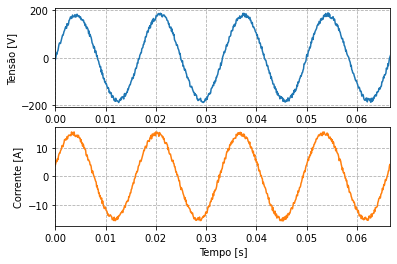

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(t, va, '#1f77b4') # plot da tensão
ax1.set_ylabel('Tensão [V]')
ax1.set_xlabel('Tempo [s]')
ax1.set_xlim(0, 4/60) # limite para a visualização de 4 ciclos do sinal 
ax1.grid(True, linestyle = '--')

ax2.plot(t, ia, '#ff7f0e') # plot da corrente
ax2.set_ylabel('Corrente [A]')
ax2.set_xlabel('Tempo [s]')
ax2.set_xlim(0, 4/60) # limite para a visualização de 4 ciclos do sinal 
ax2.grid(True, linestyle = '--')


## Cálculo e exibição dos valores eficazes de tensão e corrente a partir das leituras

> Calcula-se o valor eficaz a partir de:

$$
x_{rms} = \sqrt{\dfrac{1}{n}\sum_{i = 1}^{n} x_{i}^{2}}
$$

In [39]:
v_rms = np.sqrt(np.mean(va**2))
i_rms = np.sqrt(np.mean(ia**2))

print('Valores Eficazes:')
print('V_rms = ', v_rms)
print('I_rms = ', i_rms)

Valores Eficazes:
V_rms =  127.39783483989693
I_rms =  10.614711958308348


## Cálculo e exibição das potências

> A potência aparente $S_{a}$ pode ser calculada a partir dos valores eficazes. A potência ativa $P_{a}$ é a média do produto da tensão pela corrente e a reativa $Q_{a}$ é calculada pela relação $S_{a}^{2} = P_{a}^{2} + Q_{a}^{2}$.

In [40]:
print('Potências: ')

sa = v_rms*i_rms
print('Sa = ', sa)

pa = np.mean(va*ia)
print('Pa = ', pa)

qa = np.sqrt(sa**2 - pa**2) 
print('Qa = ', qa)

Potências: 
Sa =  1352.2913209376459
Pa =  1304.060112787626
Qa =  357.93719968677107


## Cálculo e exibição do fator de potência

> O fator de potência é calculado por:

$$
fp = \dfrac{P_{a}}{S_{a}}
$$

In [41]:
print('Fator de Potência:')
fp = pa/sa
print('fp = ', fp)

Fator de Potência:
fp =  0.9643337146343751


# Lab02: Ensaio em motores da Aula 2
---

O objetivo deste ensaio é demonstrar a possibilidade de detectar anomalias no
funcionamento de um motor de indução trifásico (MIT), decorrentes de uma não conformidade das
tensões de alimentação do equipamento, através da análise do sinal de corrente de uma das fases do
motor.

---

## Importanto Bibliotecas

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
from google.colab import files


## Condição Normal:


### Operando em vazio

In [45]:
file_name = "/content/drive/MyDrive/Colab Notebooks/Lab de Manutenção/Dados_Aula_02_vazio_60Hz_N.lvm"
cond_norm_vazio = pd.read_table(file_name, sep="\t", header=22)
cond_norm_vazio = cond_norm_vazio.rename(columns={"X_Value":"tempo"})
cond_norm_vazio = cond_norm_vazio.drop(columns=["Comment"])
cond_norm_vazio = cond_norm_vazio.apply(lambda x: x.str.replace(',','.'))
cond_norm_vazio = cond_norm_vazio.apply(pd.to_numeric)
cond_norm_vazio[["VA", "VB", "VC"]] = cond_norm_vazio[["VA", "VB", "VC"]]
cond_norm_vazio

,tempo,VA,IA,VB,IB,VC,IC
0,0.000000,-2.242390,-0.897248,0.523498,1.866665,1.743394,-0.873252
1,0.000130,-2.129637,-0.977129,0.358150,1.867980,1.742079,-0.804219
2,0.000260,-2.105969,-1.054050,0.344015,1.874884,1.780540,-0.737488
3,0.000391,-2.059948,-1.132944,0.124756,1.881458,1.890334,-0.668785
4,0.000521,-1.976780,-1.198360,0.105690,1.872911,1.892635,-0.601725
...,...,...,...,...,...,...,...
15867,2.065883,-2.182891,-0.806520,0.595160,1.800263,1.569827,-0.975485
15868,2.066014,-2.213791,-0.890345,0.572807,1.829848,1.646420,-0.906124
15869,2.066144,-2.189137,-0.970554,0.386420,1.851544,1.769363,-0.838078
15870,2.066274,-2.080329,-1.042545,0.343686,1.863049,1.738134,-0.771018


(0.0, 0.06666666666666667)

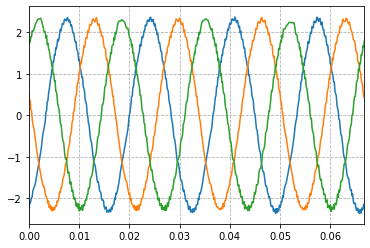

In [46]:
f1, ax1 = plt.subplots()
ax1.plot(cond_norm_vazio["tempo"], cond_norm_vazio[["VA", "VB", "VC"]])
ax1.grid(True, linestyle="--")
ax1.set_xlim(0, 4/60)

In [47]:
# valores rms

va_rms = np.sqrt((cond_norm_vazio["VA"]**2).mean())
vb_rms = np.sqrt((cond_norm_vazio["VB"]**2).mean())
vc_rms = np.sqrt((cond_norm_vazio["VC"]**2).mean())

print(va_rms, vb_rms, vc_rms)

1.620346411847489 1.5970323837024727 1.588659114020901


(0.0, 0.06666666666666667)

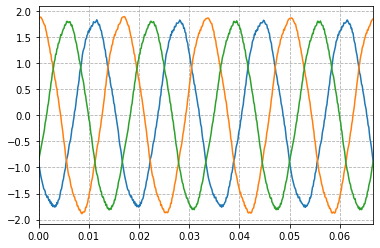

In [48]:
f2, ax2 = plt.subplots()
ax2.plot(cond_norm_vazio["tempo"], cond_norm_vazio[["IA", "IB", "IC"]])
ax2.grid(True, linestyle="--")
ax2.set_xlim(0, 4/60)

In [49]:
# valores rms de corrente

ia_rms = np.sqrt((cond_norm_vazio["IA"]**2).mean())
ib_rms = np.sqrt((cond_norm_vazio["IB"]**2).mean())
ic_rms = np.sqrt((cond_norm_vazio["IC"]**2).mean())

print(ia_rms, ib_rms, ic_rms)

1.2445620048721393 1.3021607428484168 1.2385185672999863


### Operando em carga

In [50]:
file_name = "/content/drive/MyDrive/Colab Notebooks/Lab de Manutenção/Dados_Aula_02_carga_58_5Hz_N.lvm"
cond_norm_carga = pd.read_table(file_name, sep="\t", header=22)
cond_norm_carga = cond_norm_carga.rename(columns={"X_Value":"tempo"})
cond_norm_carga = cond_norm_carga.drop(columns=["Comment"])
cond_norm_carga = cond_norm_carga.apply(lambda x: x.str.replace(',','.'))
cond_norm_carga = cond_norm_carga.apply(pd.to_numeric)
cond_norm_carga

,tempo,VA,IA,VB,IB,VC,IC
0,0.000000,-1.814062,-0.648075,1.933396,2.691763,-0.073136,-1.979739
1,0.000130,-1.742071,-0.753925,1.855489,2.700310,-0.087929,-1.851865
2,0.000260,-1.900187,-0.913356,1.779554,2.739757,0.088596,-1.768040
3,0.000391,-1.956071,-1.016247,1.779554,2.759152,0.237179,-1.680271
4,0.000521,-1.965932,-1.087909,1.767062,2.711815,0.315416,-1.528728
...,...,...,...,...,...,...,...
15867,2.065883,-1.105331,0.286159,2.155285,2.166462,-1.001783,-2.402808
15868,2.066014,-1.272323,0.211868,2.205580,2.254560,-0.883113,-2.413656
15869,2.066144,-1.370283,0.065914,2.133590,2.365998,-0.715793,-2.361388
15870,2.066274,-1.338397,-0.073136,2.076720,2.425497,-0.701657,-2.289726


(0.0, 0.06666666666666667)

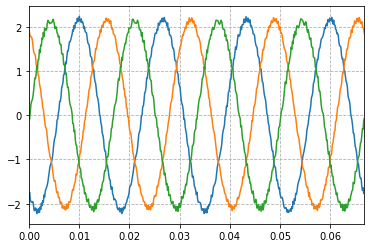

In [51]:
f3, ax3 = plt.subplots()
ax3.plot(cond_norm_carga["tempo"], cond_norm_carga[["VA", "VB", "VC"]])
ax3.grid(True, linestyle="--")
ax3.set_xlim(0, 4/60)

In [52]:
# valores rms

va_rms = np.sqrt((cond_norm_carga["VA"]**2).mean())
vb_rms = np.sqrt((cond_norm_carga["VB"]**2).mean())
vc_rms = np.sqrt((cond_norm_carga["VC"]**2).mean())

print(va_rms, vb_rms, vc_rms)

1.5210546703507755 1.4962644172522095 1.4925398734723019


(0.0, 0.06666666666666667)

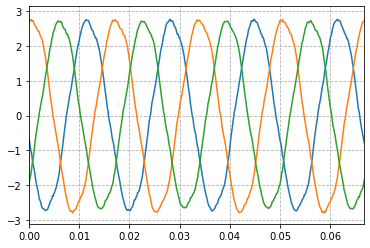

In [53]:
f4, ax4 = plt.subplots()
ax4.plot(cond_norm_carga["tempo"], cond_norm_carga[["IA", "IB", "IC"]])
ax4.grid(True, linestyle="--")
ax4.set_xlim(0, 4/60)

In [54]:
# valores rms de corrente

ia_rms = np.sqrt((cond_norm_carga["IA"]**2).mean())
ib_rms = np.sqrt((cond_norm_carga["IB"]**2).mean())
ic_rms = np.sqrt((cond_norm_carga["IC"]**2).mean())

print(ia_rms, ib_rms, ic_rms)

1.9249453061236066 1.9514947852820923 1.905205229122902


## Motor com defeito:

### Operando em vazio

In [55]:
file_name = "/content/drive/MyDrive/Colab Notebooks/Lab de Manutenção/Dados_Aula_02_vazio_60Hz_D.lvm"
cond_def_vazio = pd.read_table(file_name, sep="\t", header=22)
cond_def_vazio = cond_def_vazio.rename(columns={"X_Value":"tempo"})
cond_def_vazio = cond_def_vazio.drop(columns=["Comment"])
cond_def_vazio = cond_def_vazio.apply(lambda x: x.str.replace(',','.'))
cond_def_vazio = cond_def_vazio.apply(pd.to_numeric)
cond_def_vazio

,tempo,VA,IA,VB,IB,VC,IC
0,0.000000,-0.973513,1.693099,2.359752,-0.954775,-0.649719,-0.620462
1,0.000130,-1.023150,1.541557,2.455411,-0.887715,-0.647747,-0.664512
2,0.000260,-1.149709,1.463978,2.367312,-0.766087,-0.541240,-0.639857
3,0.000391,-1.221700,1.355499,2.434701,-0.643802,-0.438678,-0.623421
4,0.000521,-1.234191,1.214805,2.367641,-0.536966,-0.430460,-0.639528
...,...,...,...,...,...,...,...
15867,2.065883,0.665178,2.566519,1.726629,-1.994203,-1.801241,-0.547157
15868,2.066014,0.559001,2.535619,1.796976,-1.938319,-1.751604,-0.570496
15869,2.066144,0.457096,2.502089,1.887046,-1.886710,-1.697693,-0.590220
15870,2.066274,0.360780,2.467573,1.983691,-1.842003,-1.637208,-0.593836


(0.0, 0.06666666666666667)

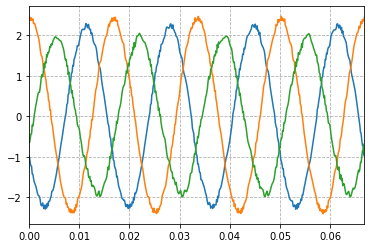

In [56]:
f5, ax5 = plt.subplots()
ax5.plot(cond_def_vazio["tempo"], cond_def_vazio[["VA", "VB", "VC"]])
ax5.grid(True, linestyle="--")
ax5.set_xlim(0, 4/60)

In [57]:
# valores rms

va_rms = np.sqrt((cond_def_vazio["VA"]**2).mean())
vb_rms = np.sqrt((cond_def_vazio["VB"]**2).mean())
vc_rms = np.sqrt((cond_def_vazio["VC"]**2).mean())

print(va_rms, vb_rms, vc_rms)

1.5725879235829825 1.6702617977279604 1.3478007231712654


(0.0, 0.06666666666666667)

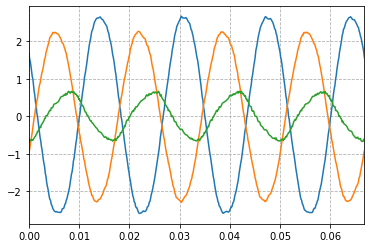

In [58]:
f6, ax6 = plt.subplots()
ax6.plot(cond_def_vazio["tempo"], cond_def_vazio[["IA", "IB", "IC"]])
ax6.grid(True, linestyle="--")
ax6.set_xlim(0, 4/60)

In [59]:
# valores rms

ia_rms = np.sqrt((cond_def_vazio["IA"]**2).mean())
ib_rms = np.sqrt((cond_def_vazio["IB"]**2).mean())
ic_rms = np.sqrt((cond_def_vazio["IC"]**2).mean())

print(ia_rms, ib_rms, ic_rms)

1.8911466591423234 1.5952894358736456 0.44583785390724145


### Operando em carga

In [60]:
file_name = "/content/drive/MyDrive/Colab Notebooks/Lab de Manutenção/Dados_Aula_02_carga_59Hz_D.lvm"
cond_def_carga = pd.read_table(file_name, sep="\t", header=22)
cond_def_carga = cond_def_carga.rename(columns={"X_Value":"tempo"})
cond_def_carga = cond_def_carga.drop(columns=["Comment"])
cond_def_carga = cond_def_carga.apply(lambda x: x.str.replace(',','.'))
cond_def_carga = cond_def_carga.apply(pd.to_numeric)
cond_def_carga[["VA", "VB", "VC"]] = cond_def_carga[["VA", "VB", "VC"]]
cond_def_carga

,tempo,VA,IA,VB,IB,VC,IC
0,0.000000,0.531059,-1.152339,-2.216092,0.387406,0.887067,0.728294
1,0.000130,0.542236,-1.017890,-2.194396,0.321662,0.923556,0.718432
2,0.000260,0.713501,-0.926176,-2.261785,0.226660,0.801270,0.697393
3,0.000391,0.697065,-0.739789,-2.172700,0.074132,0.842690,0.624745
4,0.000521,0.802585,-0.494561,-2.242719,-0.127047,0.787464,0.585298
...,...,...,...,...,...,...,...
15867,2.065883,-0.929135,-2.237130,-1.458053,1.508685,1.571471,0.747360
15868,2.066014,-0.819012,-2.114187,-1.509662,1.429134,1.536626,0.717774
15869,2.066144,-0.706588,-1.993545,-1.590857,1.311122,1.510986,0.708241
15870,2.066274,-0.590877,-1.883094,-1.675997,1.211518,1.481729,0.720075


(0.0, 0.06666666666666667)

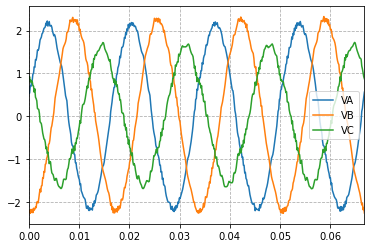

In [61]:
f7, ax7 = plt.subplots()
ax7.plot(cond_def_vazio["tempo"], cond_def_carga[["VA", "VB", "VC"]])
ax7.grid(True, linestyle="--")
ax7.legend(["VA", "VB", "VC"])
ax7.set_xlim(0, 4/60)

In [62]:
# valores rms

va_rms = np.sqrt((cond_def_carga["VA"]**2).mean())
vb_rms = np.sqrt((cond_def_carga["VB"]**2).mean())
vc_rms = np.sqrt((cond_def_carga["VC"]**2).mean())

print(va_rms, vb_rms, vc_rms)

1.521979795389084 1.5663734309218922 1.1177900546916664


(0.0, 0.06666666666666667)

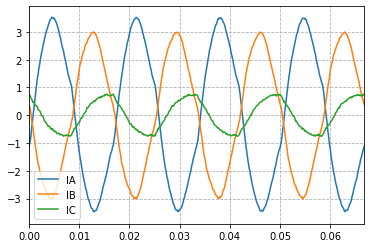

In [63]:
f8, ax8 = plt.subplots()
ax8.plot(cond_def_carga["tempo"], cond_def_carga[["IA", "IB", "IC"]])
ax8.legend(["IA", "IB", "IC"])
ax8.grid(True, linestyle="--")
ax8.set_xlim(0, 4/60)

In [64]:
# valores rms

ia_rms = np.sqrt((cond_def_carga["IA"]**2).mean())
ib_rms = np.sqrt((cond_def_carga["IB"]**2).mean())
ic_rms = np.sqrt((cond_def_carga["IC"]**2).mean())

print(ia_rms, ib_rms, ic_rms)

2.398218038780813 2.040244433602505 0.530666134422205


## FFT

In [65]:
def to_db(amp_lin):
  amp_db = 20*np.log10(abs(amp_lin))
  return amp_db

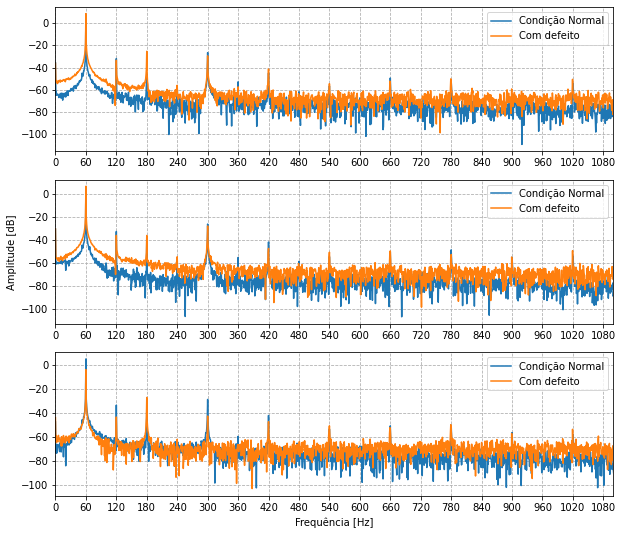

In [66]:
# sistema operando em vazio

# obtenção do sample time e do número de amostras da FFT
N = cond_norm_vazio["tempo"].size
ini = cond_norm_vazio["tempo"].iloc[0]
fim = cond_norm_vazio["tempo"].iloc[-1]
Fs = (fim - ini)/N
n = 10240
nn = 5120

# operando em condição normal
yf_a_n = np.fft.fft(cond_norm_vazio["IA"], n)
yf_b_n = np.fft.fft(cond_norm_vazio["IB"], n)
yf_c_n = np.fft.fft(cond_norm_vazio["IC"], n)

yf_a_n = np.abs(yf_a_n[0:nn])/nn
yf_b_n = np.abs(yf_b_n[0:nn])/nn
yf_c_n = np.abs(yf_c_n[0:nn])/nn

# operando com defeito
yf_a_d = np.fft.fft(cond_def_vazio["IA"], n)
yf_b_d = np.fft.fft(cond_def_vazio["IB"], n)
yf_c_d = np.fft.fft(cond_def_vazio["IC"], n)

yf_a_d = np.abs(yf_a_d[0:nn])/nn
yf_b_d = np.abs(yf_b_d[0:nn])/nn
yf_c_d = np.abs(yf_c_d[0:nn])/nn

# obtenção do vetor de frequência
xf = np.fft.fftfreq(n, Fs)
xf = xf[0:nn]
mx = 1100
k = np.arange(0, mx, 60)

#plot dos sinais, operando em condição normal e com defeito 
fig, ax = plt.subplots(3, 1, figsize=(10, 9))

ax[0].plot(xf, to_db(yf_a_n), xf, to_db(yf_a_d))
ax[0].grid(True, linestyle="--")
ax[0].set_xticks(k)
ax[0].set_xlim(0, mx)
ax[0].legend(["Condição Normal", "Com defeito"])

ax[1].plot(xf, to_db(yf_b_n), xf, to_db(yf_b_d))
ax[1].grid(True, linestyle="--")
ax[1].set_xticks(k)
ax[1].set_xlim(0, mx)
ax[1].set_ylabel('Amplitude [dB]')
ax[1].legend(["Condição Normal", "Com defeito"])

ax[2].plot(xf, to_db(yf_c_n), xf, to_db(yf_c_d))
ax[2].grid(True, linestyle="--")
ax[2].set_xticks(k)
ax[2].set_xlim(0, mx)
ax[2].set_xlabel('Frequência [Hz]')
ax[2].legend(["Condição Normal", "Com defeito"])

#plt.savefig("fft_vazio.pdf", bbox_inches='tight')
#files.download("fft_vazio.pdf")

Text(0.5, 0, 'Frequência [Hz]')

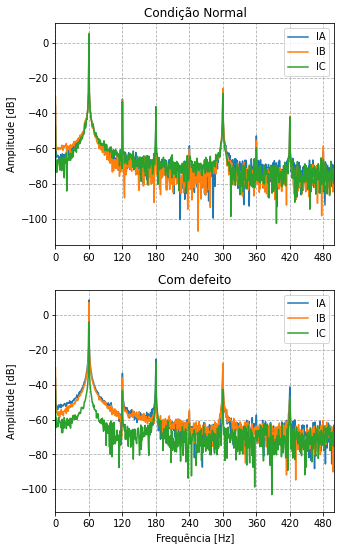

In [67]:
fig, ax = plt.subplots(2, 1, figsize=(5, 9))

ax[0].plot(xf, to_db(yf_a_n), xf, to_db(yf_b_n), xf, to_db(yf_c_n))
ax[0].grid(True, linestyle="--")
ax[0].set_xticks(k)
ax[0].set_xlim(0, 500)
ax[0].set_title("Condição Normal")
ax[0].set_ylabel('Amplitude [dB]')
ax[0].legend(['IA', 'IB', 'IC'])

ax[1].plot(xf, to_db(yf_a_d), xf, to_db(yf_b_d), xf, to_db(yf_c_d))
ax[1].grid(True, linestyle="--")
ax[1].set_xticks(k)
ax[1].set_xlim(0, 500)
ax[1].set_title("Com defeito")
ax[1].set_ylabel('Amplitude [dB]')
ax[1].legend(['IA', 'IB', 'IC'])
ax[1].set_xlabel('Frequência [Hz]')

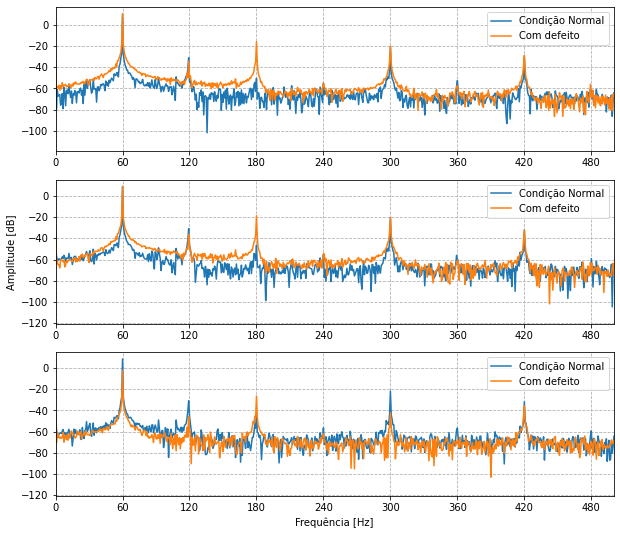

In [68]:
# sistema operando em carga

# obtenção do sample time e do número de amostras da FFT
N = cond_norm_carga["tempo"].size
ini = cond_norm_carga["tempo"].iloc[0]
fim = cond_norm_carga["tempo"].iloc[-1]
Fs = (fim - ini)/N
n = 10240
nn = 5120

# operando em condição normal
yf_a_n = np.fft.fft(cond_norm_carga["IA"], n)
yf_b_n = np.fft.fft(cond_norm_carga["IB"], n)
yf_c_n = np.fft.fft(cond_norm_carga["IC"], n)

yf_a_n = np.abs(yf_a_n[0:nn])/nn
yf_b_n = np.abs(yf_b_n[0:nn])/nn
yf_c_n = np.abs(yf_c_n[0:nn])/nn

# operando com defeito
yf_a_d = np.fft.fft(cond_def_carga["IA"], n)
yf_b_d = np.fft.fft(cond_def_carga["IB"], n)
yf_c_d = np.fft.fft(cond_def_carga["IC"], n)

yf_a_d = np.abs(yf_a_d[0:nn])/nn
yf_b_d = np.abs(yf_b_d[0:nn])/nn
yf_c_d = np.abs(yf_c_d[0:nn])/nn

# obtenção do vetor de frequência
xf = np.fft.fftfreq(n, Fs)
xf = xf[0:nn]
k = np.arange(0, 500, 60)

#plot dos sinais, operando em condição normal e com defeito 
fig, ax = plt.subplots(3, 1, figsize=(10, 9))

ax[0].plot(xf, to_db(yf_a_n), xf, to_db(yf_a_d))
ax[0].grid(True, linestyle="--")
ax[0].set_xlim(0, 500)
ax[0].set_xticks(k)
ax[0].legend(["Condição Normal", "Com defeito"])

ax[1].plot(xf, to_db(yf_b_n), xf, to_db(yf_b_d))
ax[1].grid(True, linestyle="--")
ax[1].set_xlim(0, 500)
ax[1].set_xticks(k)
ax[1].set_ylabel('Amplitude [dB]')
ax[1].legend(["Condição Normal", "Com defeito"])

ax[2].plot(xf, to_db(yf_c_n), xf, to_db(yf_c_d))
ax[2].grid(True, linestyle="--")
ax[2].set_xlim(0, 500)
ax[2].set_xticks(k)
ax[2].set_xlabel('Frequência [Hz]')
ax[2].legend(["Condição Normal", "Com defeito"])


Text(0.5, 0, 'Frequência [Hz]')

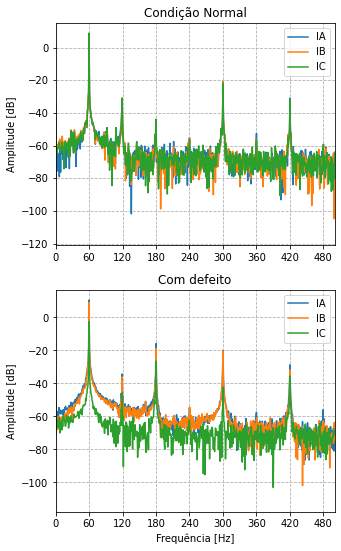

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(5, 9))

ax[0].plot(xf, to_db(yf_a_n), xf, to_db(yf_b_n), xf, to_db(yf_c_n))
ax[0].grid(True, linestyle="--")
ax[0].set_xticks(k)
ax[0].set_xlim(0, 500)
ax[0].set_title("Condição Normal")
ax[0].set_ylabel('Amplitude [dB]')
ax[0].legend(['IA', 'IB', 'IC'])

ax[1].plot(xf, to_db(yf_a_d), xf, to_db(yf_b_d), xf, to_db(yf_c_d))
ax[1].grid(True, linestyle="--")
ax[1].set_xticks(k)
ax[1].set_xlim(0, 500)
ax[1].set_title("Com defeito")
ax[1].set_ylabel('Amplitude [dB]')
ax[1].legend(['IA', 'IB', 'IC'])
ax[1].set_xlabel('Frequência [Hz]')

## DFT

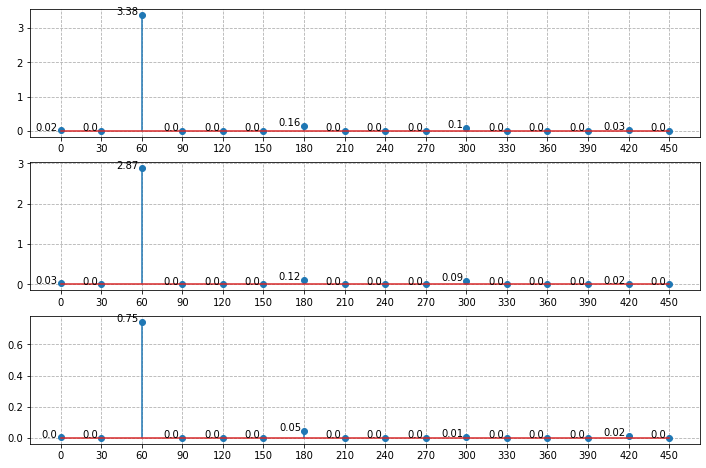

In [70]:
# exemplo de DFT

t = cond_def_carga["tempo"]
ia = cond_def_carga["IA"]
ib = cond_def_carga["IB"]
ic = cond_def_carga["IC"]

samp = 16

k = np.arange(0, 480, 30)
media_a = np.zeros(samp)
media_b = np.zeros(samp)
media_c = np.zeros(samp)

for n in k:
  s1 = np.sin(2*n*np.pi*t)
  ims_a = ia*s1
  ims_b = ib*s1
  ims_c = ic*s1

  c1 = np.cos(2*n*np.pi*t)
  imc_a = ia*c1
  imc_b = ib*c1
  imc_c = ic*c1

  media_a[n//30] = 2*np.sqrt(np.mean(ims_a)**2 + np.mean(imc_a)**2)
  media_b[n//30] = 2*np.sqrt(np.mean(ims_b)**2 + np.mean(imc_b)**2)
  media_c[n//30] = 2*np.sqrt(np.mean(ims_c)**2 + np.mean(imc_c)**2)

m_a_str = np.zeros(samp)
m_b_str = np.zeros(samp)
m_c_str = np.zeros(samp)

for m in np.arange(0, samp, 1):
  m_a_str[m] = round(media_a[m], 2)
  m_b_str[m] = round(media_b[m], 2)
  m_c_str[m] = round(media_c[m], 2)

fig, ax = plt.subplots(3, 1, figsize=(12, 8))
ax[0].stem(k, media_a, use_line_collection = True)
ax[0].grid(True, linestyle="--")
ax[0].set_xticks(k)

for d, l, r in zip(k, media_a, m_a_str):
    ax[0].annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="center")

ax[1].stem(k, media_b, use_line_collection = True)
ax[1].grid(True, linestyle="--")
ax[1].set_xticks(k)

for d, l, r in zip(k, media_b, m_b_str):
    ax[1].annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="center")

ax[2].stem(k, media_c, use_line_collection = True)
ax[2].grid(True, linestyle="--")
ax[2].set_xticks(k)

for d, l, r in zip(k, media_c, m_c_str):
    ax[2].annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="center")